In [2]:
import IPython

import pandas as pd
import matplotlib.pyplot as plt
import qiime2 as q2
import seaborn as sns
from qiime2 import Visualization
import matplotlib.cm as cm
import numpy as np  



import os

import matplotlib.pyplot as plt
%matplotlib inline

data_dir = 'data'

# Plots

In [5]:
metadata_rucc = pd.read_csv(f"{data_dir}/metadata_rucc.tsv", sep="\t")
metadata_ed = pd.read_csv(f"{data_dir}/metadata_rucc.tsv", sep="\t")
bins_bmi = [0, 18.5, 24.9, 29.9, 34.9, 39.9, float('inf')]
labels_bmi = ['Underweight', 'Normal', 'Overweight', 'Adipose 1', 'Adipose 2', 'Adipose 3']
metadata_ed['BMI_category'] = pd.cut(metadata_rucc['bmi_sample'], bins=bins_bmi, labels=labels_bmi, right=True)
metadata_ed.to_csv(f"{data_dir}/metadata_ed.tsv", sep="\t", index=False)

In [6]:
bins_age = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
labels_age = ["0-10", "11-20", "21-30", "31-40", "41-50", "51-60",
          "61-70", "71-80", "81-90", "91-100"]

**Diet type and age in categories**

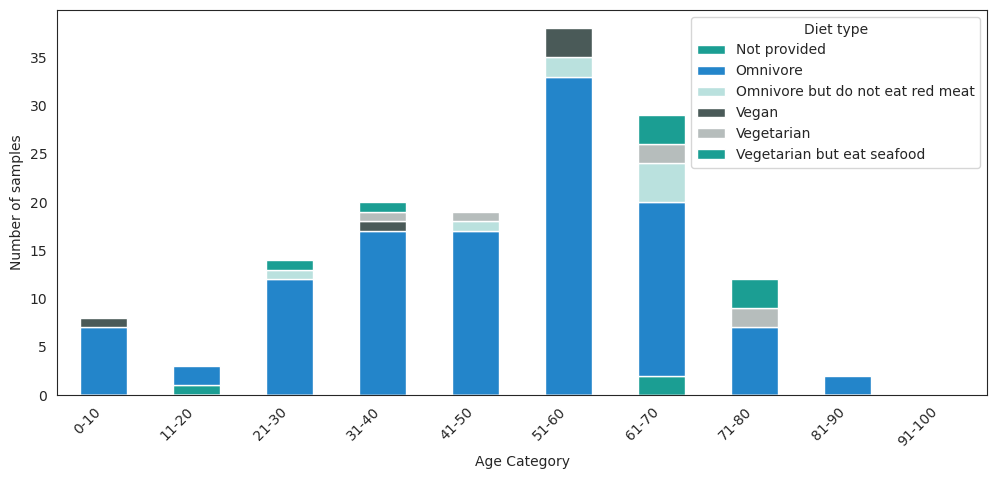

In [7]:
metadata_ed.loc[:, 'age_category'] = pd.cut(
    metadata_ed['age_years_sample'],
    bins=bins_age,
    labels=labels_age,
    include_lowest=True)

subset = metadata_ed.dropna(subset=['age_category', 'diet_type_sample'])
grouped = subset.groupby(
    ['age_category', 'diet_type_sample'],
    observed=False
).size().reset_index(name='sample_count')

stacked = grouped.pivot(
    index='age_category',
    columns='diet_type_sample',
    values='sample_count'
).fillna(0)

num_bars = stacked.shape[1]  
colors = ["#1b9e93", "#2385ca", "#bae1de", "#4a5a58", "#b6bdbc" ]


with sns.axes_style("white"):
    fig, ax = plt.subplots(figsize=(12, 5))

    stacked.plot(
        kind='bar',
        stacked=True,
        color=colors,    
        ax=ax)
    ax.set_xlabel('Age Category')
    ax.set_ylabel('Number of samples')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

    legend = ax.get_legend()
    legend.set_title('Diet type')


plt.show()

**Relative BMI in diet type**

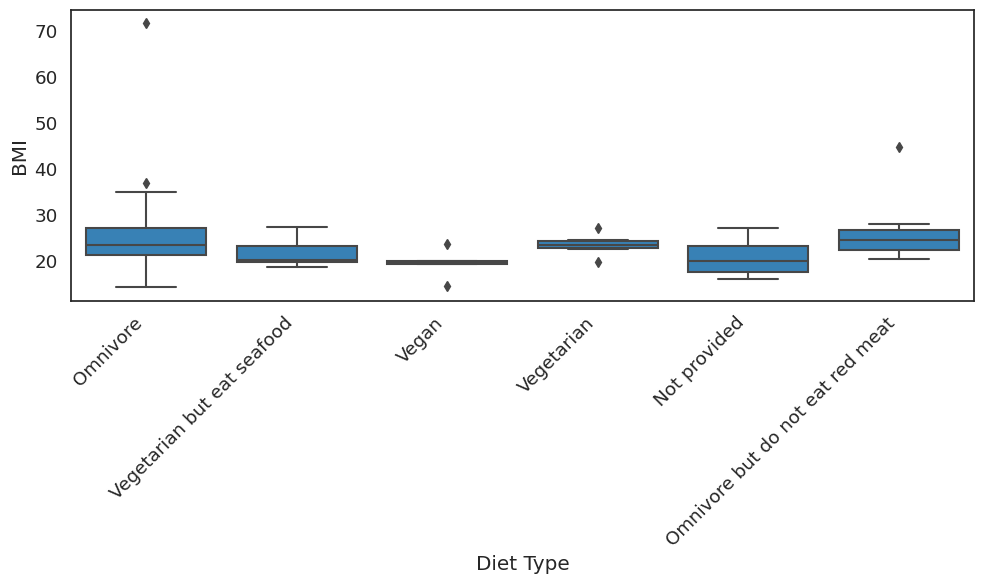

In [8]:

subset = metadata_ed.dropna(
    subset=['diet_type_sample', 'bmi_sample']
).copy()

sns.set(rc={'figure.figsize': (10, 6)}, style='white')

with sns.plotting_context("notebook", font_scale=1.2):
    ax = sns.boxplot(
        data=subset,
        x='diet_type_sample',
        y='bmi_sample',
        color='#2385ca'   
    )
    
    ax.set_xlabel('Diet Type')
    ax.set_ylabel('BMI')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.show()

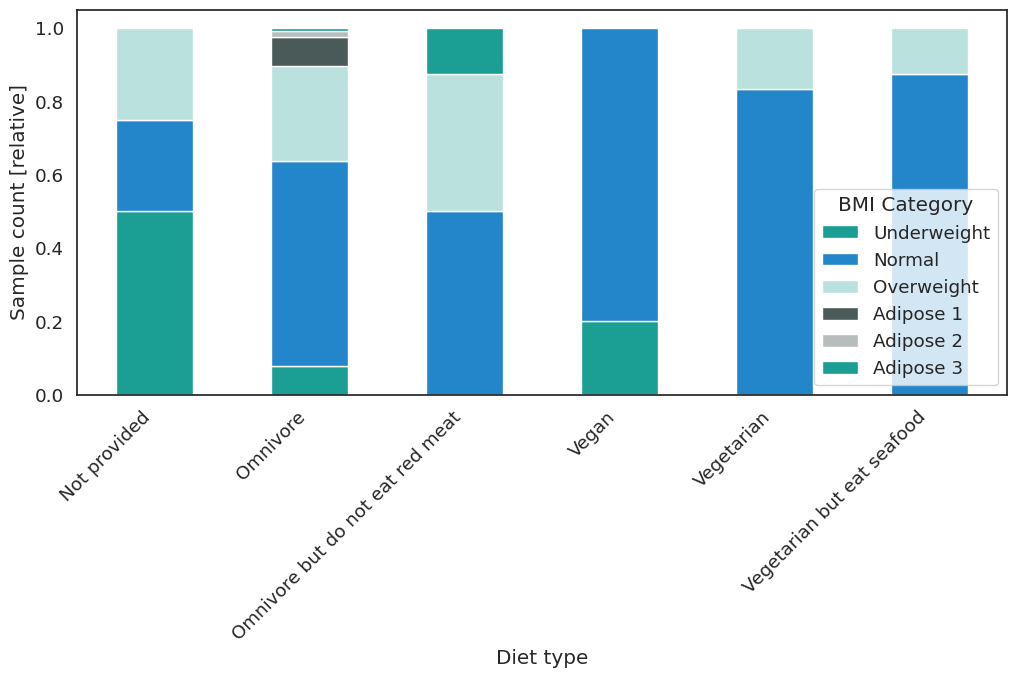

In [9]:
num_bars = stacked.shape[1]  
colors = ["#1b9e93", "#2385ca", "#bae1de", "#4a5a58", "#b6bdbc" ]

subset = metadata_ed.dropna(subset=['diet_type_sample', 'BMI_category']).copy()

grouped = subset.groupby(['diet_type_sample', 'BMI_category'], observed=False) \
                .size() \
                .reset_index(name='sample_count')

stacked = grouped.pivot(
    index='diet_type_sample',
    columns='BMI_category',
    values='sample_count'
).fillna(0)

stacked_rel = stacked.div(stacked.sum(axis=1), axis=0)

sns.set(rc={'figure.figsize': (12, 5)}, style='white')

with sns.plotting_context("notebook", font_scale=1.2):

    ax = stacked_rel.plot(
        kind='bar',
        stacked=True,
        color=colors)

    ax.set_xlabel('Diet type')
    ax.set_ylabel('Sample count [relative]')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

    legend = ax.get_legend()
    legend.set_title('BMI Category')

plt.show()

**Diet type and IBD**

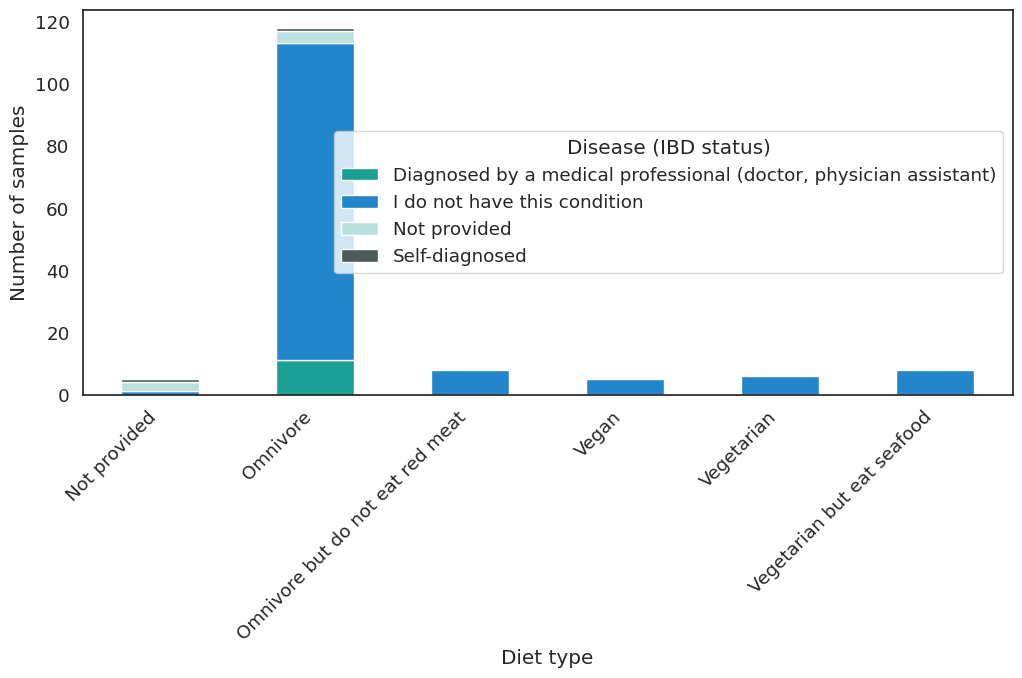

In [11]:
subset_2 = metadata_ed[['diet_type_sample', 'ibd_sample']]

grouped_2 = (
    subset_2
    .groupby(['diet_type_sample', 'ibd_sample'], observed=False)
    .size()
    .reset_index(name='sample_count'))

stacked = grouped_2.pivot(
    index='diet_type_sample',
    columns='ibd_sample',
    values='sample_count'
).fillna(0)

colors = ["#1b9e93", "#2385ca", "#bae1de", "#4a5a58", "#b6bdbc" ]

sns.set(rc={'figure.figsize': (12, 5)}, style='white')

with sns.plotting_context("notebook", font_scale=1.2):
    ax = stacked.plot(
        kind='bar',
        stacked=True,
        color=colors )

    ax.set_xlabel('Diet type')
    ax.set_ylabel('Number of samples')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

    legend_2 = ax.get_legend()
    legend_2.set_title('Disease (IBD status)')

plt.show()

In [12]:
# Define gluten disease categories
gluten_disease_values = [
    "I do not eat gluten because it makes me feel bad",
    "I was diagnosed with gluten allergy (anti-gluten IgG), but not celiac disease",
    "I was diagnosed with celiac disease"
]

# Create the disease flag
metadata_ed['has_disease'] = (
    (metadata_ed['ibd_sample'] == "Diagnosed by a medical professional (doctor, physician assistant)") |
    (metadata_ed['gluten_sample'].isin(gluten_disease_values))
).map({True: "Disease", False: "No disease"})


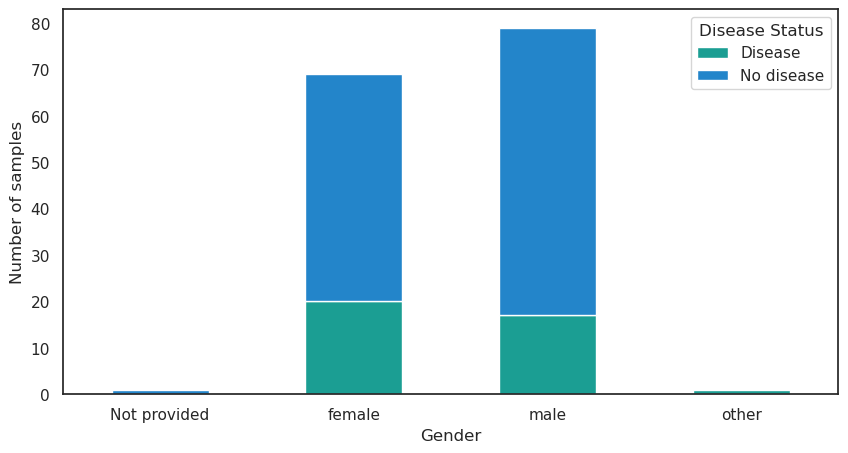

In [13]:
subset = metadata_ed.dropna(subset=['sex_sample', 'has_disease'])

grouped = subset.groupby(
    ['sex_sample', 'has_disease'],
    observed=False
).size().reset_index(name='sample_count')

stacked = grouped.pivot(
    index='sex_sample',
    columns='has_disease',
    values='sample_count'
).fillna(0)

num_bars = stacked.shape[1]
colors = ["#1b9e93", "#2385ca"]

with sns.axes_style("white"):
    fig, ax = plt.subplots(figsize=(10, 5))

    stacked.plot(
        kind='bar',
        stacked=True,
        color=colors,
        ax=ax
    )

    ax.set_xlabel('Gender')
    ax.set_ylabel('Number of samples')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

    legend = ax.get_legend()
    legend.set_title('Disease Status')

plt.show()


# Denoising

## Denoising run

In [ ]:
!qiime dada2 denoise-single \
   --i-demultiplexed-seqs $data_dir/02/fungut_forward_reads.qza \
   --p-trim-left 0 \
   --p-trunc-len 0 \
   --p-min-fold-parent-over-abundance 1 \
   --p-max-ee 1 \
    --o-representative-sequences $data_dir/03/adapt/0_dada2_rep_seqs.qza \
    --o-table $data_dir/03/adapt/0_dada2_table.qza \
    --o-denoising-stats $data_dir/03/adapt/0_dada2_stats.qza

!qiime dada2 denoise-single \
   --i-demultiplexed-seqs $data_dir/02/fungut_forward_reads.qza \
   --p-trim-left 0 \
   --p-trunc-len 0 \
   --p-min-fold-parent-over-abundance 2 \
   --p-max-ee 2 \
    --o-representative-sequences $data_dir/03/adapt/2_dada2_rep_seqs.qza \
    --o-table $data_dir/03/adapt/2_dada2_table.qza \
    --o-denoising-stats $data_dir/03/adapt/2_dada2_stats.qza

!qiime dada2 denoise-single \
   --i-demultiplexed-seqs $data_dir/02/fungut_forward_reads.qza \
   --p-trim-left 0 \
   --p-trunc-len 0 \
   --p-min-fold-parent-over-abundance 3 \
   --p-max-ee 3 \
    --o-representative-sequences $data_dir/03/adapt/3_dada2_rep_seqs.qza \
    --o-table $data_dir/03/adapt/3_dada2_table.qza \
    --o-denoising-stats $data_dir/03/adapt/3_dada2_stats.qza

!qiime dada2 denoise-single \
   --i-demultiplexed-seqs $data_dir/02/fungut_forward_reads.qza \
   --p-trim-left 0 \
   --p-trunc-len 0 \
   --p-min-fold-parent-over-abundance 4 \
   --p-max-ee 4 \
    --o-representative-sequences $data_dir/03/adapt/4_dada2_rep_seqs.qza \
    --o-table $data_dir/03/adapt/4_dada2_table.qza \
    --o-denoising-stats $data_dir/03/adapt/4_dada2_stats.qza

!qiime dada2 denoise-single \
   --i-demultiplexed-seqs $data_dir/02/fungut_forward_reads.qza \
   --p-trim-left 0 \
   --p-trunc-len 0 \
   --p-min-fold-parent-over-abundance 5 \
   --p-max-ee 5 \
    --o-representative-sequences $data_dir/03/adapt/5_dada2_rep_seqs.qza \
    --o-table $data_dir/03/adapt/5_dada2_table.qza \
    --o-denoising-stats $data_dir/03/adapt/5_dada2_stats.qza

!qiime dada2 denoise-single \
   --i-demultiplexed-seqs $data_dir/02/fungut_forward_reads.qza \
   --p-trim-left 0 \
   --p-trunc-len 0 \
   --p-min-fold-parent-over-abundance 6 \
   --p-max-ee 6 \
    --o-representative-sequences $data_dir/03/adapt/6_dada2_rep_seqs.qza \
    --o-table $data_dir/03/adapt/6_dada2_table.qza \
    --o-denoising-stats $data_dir/03/adapt/6_dada2_stats.qza

!qiime dada2 denoise-single \
   --i-demultiplexed-seqs $data_dir/01/fungut_forward_reads.qza \
   --p-trim-left 0 \
   --p-trunc-len 0 \
   --p-min-fold-parent-over-abundance 7 \
   --p-max-ee 7 \
    --o-representative-sequences $data_dir/03/adapt/7_dada2_rep_seqs.qza \
    --o-table $data_dir/03/adapt/7_dada2_table.qza \
    --o-denoising-stats $data_dir/03/adapt/7_dada2_stats.qza

## stats

In [ ]:
! qiime tools export --input-path $data_dir/03/adapt/1_dada2_stats.qza --output-path $data_dir/03/adapt/stats1
! qiime tools export --input-path $data_dir/03/adapt/2_dada2_stats.qza --output-path $data_dir/03/adapt/stats2
! qiime tools export --input-path $data_dir/03/adapt/3_dada2_stats.qza --output-path $data_dir/03/adapt/stats3
! qiime tools export --input-path $data_dir/03/adapt/4_dada2_stats.qza --output-path $data_dir/03/adapt/stats4
! qiime tools export --input-path $data_dir/03/adapt/5_dada2_stats.qza --output-path $data_dir/03/adapt/stats5
! qiime tools export --input-path $data_dir/03/adapt/6_dada2_stats.qza --output-path $data_dir/03/adapt/stats6
! qiime tools export --input-path $data_dir/03/adapt/7_dada2_stats.qza --output-path $data_dir/03/adapt/stats7

## dfs

In [ ]:
df_stats1 = pd.read_csv(f"{data_dir}/03/adapt/stats1/stats.tsv", sep="\t")
df_stats1 = df_stats1.iloc[1:].reset_index(drop=True)
df_stats1 = df_stats1.apply(pd.to_numeric, errors='coerce')

df_stats2 = pd.read_csv(f"{data_dir}/03/adapt/stats2/stats.tsv", sep="\t")
df_stats2 = df_stats2.iloc[1:].reset_index(drop=True)
df_stats2 = df_stats2.apply(pd.to_numeric, errors='coerce')

df_stats3 = pd.read_csv(f"{data_dir}/03/adapt/stats3/stats.tsv", sep="\t")
df_stats3 = df_stats3.iloc[1:].reset_index(drop=True)
df_stats3 = df_stats3.apply(pd.to_numeric, errors='coerce')

df_stats4 = pd.read_csv(f"{data_dir}/03/adapt/stats4/stats.tsv", sep="\t")
df_stats4 = df_stats4.iloc[1:].reset_index(drop=True)
df_stats4 = df_stats4.apply(pd.to_numeric, errors='coerce')

df_stats5 = pd.read_csv(f"{data_dir}/03/adapt/stats5/stats.tsv", sep="\t")
df_stats5 = df_stats5.iloc[1:].reset_index(drop=True)
df_stats5 = df_stats5.apply(pd.to_numeric, errors='coerce')

df_stats6 = pd.read_csv(f"{data_dir}/03/adapt/stats6/stats.tsv", sep="\t")
df_stats6 = df_stats6.iloc[1:].reset_index(drop=True)
df_stats6 = df_stats6.apply(pd.to_numeric, errors='coerce')

df_stats7 = pd.read_csv(f"{data_dir}/03/adapt/stats7/stats.tsv", sep="\t")
df_stats7 = df_stats7.iloc[1:].reset_index(drop=True)
df_stats7 = df_stats7.apply(pd.to_numeric, errors='coerce')

## Averages

In [ ]:
print("p-min-fold-parent-over-abundance 1 and p-max-ee 1")
print("Average filtered:", round(df_stats1["filtered"].mean(), 2))
print("Average denoised:", round(df_stats1["denoised"].mean(), 2))
print("percentage of input passed filter:", round(df_stats1["percentage of input passed filter"].mean(), 2))
print("Average non-chimeric:", round(df_stats1["non-chimeric"].mean(), 2))
print("Average % non-chimeric:", round(df_stats1["percentage of input non-chimeric"].mean(), 2))

In [ ]:
print("p-min-fold-parent-over-abundance 2 and p-max-ee 2")
print("Average filtered:", round(df_stats2["filtered"].mean(), 2))
print("Average denoised:", round(df_stats2["denoised"].mean(), 2))
print("percentage of input passed filter:", round(df_stats2["percentage of input passed filter"].mean(), 2))
print("Average non-chimeric:", round(df_stats2["non-chimeric"].mean(), 2))
print("Average % non-chimeric:", round(df_stats2["percentage of input non-chimeric"].mean(), 2))

In [ ]:
print("p-min-fold-parent-over-abundance 3 and p-max-ee 3")
print("Average filtered:", round(df_stats3["filtered"].mean(), 2))
print("Average denoised:", round(df_stats3["denoised"].mean(), 2))
print("percentage of input passed filter:", round(df_stats3["percentage of input passed filter"].mean(), 2))
print("Average non-chimeric:", round(df_stats3["non-chimeric"].mean(), 2))
print("Average % non-chimeric:", round(df_stats3["percentage of input non-chimeric"].mean(), 2))

In [ ]:
print("p-min-fold-parent-over-abundance 4 and p-max-ee 4")
print("Average filtered:", round(df_stats4["filtered"].mean(), 2))
print("Average denoised:", round(df_stats4["denoised"].mean(), 2))
print("percentage of input passed filter:", round(df_stats4["percentage of input passed filter"].mean(), 2))
print("Average non-chimeric:", round(df_stats4["non-chimeric"].mean(), 2))
print("Average % non-chimeric:", round(df_stats4["percentage of input non-chimeric"].mean(), 2))

In [ ]:
print("p-min-fold-parent-over-abundance 5 and p-max-ee 5")
print("Average filtered:", round(df_stats5["filtered"].mean(), 2))
print("Average denoised:", round(df_stats5["denoised"].mean(), 2))
print("percentage of input passed filter:", round(df_stats5["percentage of input passed filter"].mean(), 2))
print("Average non-chimeric:", round(df_stats5["non-chimeric"].mean(), 2))
print("Average % non-chimeric:", round(df_stats5["percentage of input non-chimeric"].mean(), 2))

In [ ]:
print("p-min-fold-parent-over-abundance 6 and p-max-ee 6")
print("Average filtered:", round(df_stats6["filtered"].mean(), 2))
print("Average denoised:", round(df_stats6["denoised"].mean(), 2))
print("percentage of input passed filter:", round(df_stats6["percentage of input passed filter"].mean(), 2))
print("Average non-chimeric:", round(df_stats6["non-chimeric"].mean(), 2))
print("Average % non-chimeric:", round(df_stats6["percentage of input non-chimeric"].mean(), 2))

In [ ]:
print("p-min-fold-parent-over-abundance 7 and p-max-ee 7")
print("Average filtered:", round(df_stats7["filtered"].mean(), 2))
print("Average denoised:", round(df_stats7["denoised"].mean(), 2))
print("percentage of input passed filter:", round(df_stats7["percentage of input passed filter"].mean(), 2))
print("Average non-chimeric:", round(df_stats7["non-chimeric"].mean(), 2))
print("Average % non-chimeric:", round(df_stats7["percentage of input non-chimeric"].mean(), 2))

## Summary table

|Run | Average filtered | Average denoised |Average of input passed filter (%) | Average non-chimeric | Average non-chimeric (%) |
|-------|-------|-------|--|-----|-------|
| 1|  52900.59 | 52817.95  |81.52|  52226.44 |  80.52 |
| 2| 61473.91  |  60589.27 |95.18 | 60106.21 |  93.06 |
| 3|  63218.06 |  61963.87 |98.34|  61503.23 | 95.62  |
| 4|  63341.81 |  62046.85 |98.57|  61664.69 |  95.91 |
| 5|  63344.14 |  62047.56 |98.57 | 61667.37 |  95.92 |
| 6| 63344.29  |  62047.59 |98.57 | 61706.43 | 95.97  |
| 7| 63344.29  |  62047.59 |98.57 | 61737.85 | 96.01  |


## Plots denoising

In [ ]:
dfs = [df_stats1, df_stats2, df_stats3, df_stats4, df_stats5, df_stats6, df_stats7]

groups = ["df_stats1", "df_stats2", "df_stats3", "df_stats4", "df_stats5", "df_stats6", "df_stats7"]

# Mittelwerte links (non-chimeric)
mean_non_chimeric = [
    df_stats1["non-chimeric"].mean(),
    df_stats2["non-chimeric"].mean(),
    df_stats3["non-chimeric"].mean(),
    df_stats4["non-chimeric"].mean(),
    df_stats5["non-chimeric"].mean(),
    df_stats6["non-chimeric"].mean(),
    df_stats7["non-chimeric"].mean()
]

# Mittelwerte rechts (percentage of input passed filter)
mean_passed_filter = [
    df_stats1["percentage of input passed filter"].mean(),
    df_stats2["percentage of input passed filter"].mean(),
    df_stats3["percentage of input passed filter"].mean(),
    df_stats4["percentage of input passed filter"].mean(),
    df_stats5["percentage of input passed filter"].mean(),
    df_stats6["percentage of input passed filter"].mean(),
    df_stats7["percentage of input passed filter"].mean()
]


mean_nc = [df["non-chimeric"].mean() for df in dfs]
std_nc = [df["non-chimeric"].std() for df in dfs]

mean_pf = [df["percentage of input passed filter"].mean() for df in dfs]
std_pf = [df["percentage of input passed filter"].std() for df in dfs]


sns.set(rc={'figure.figsize': (10, 6)}, style='white')
fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.plot(groups, mean_non_chimeric, marker='o', color='#2385ca')
ax1.scatter(groups, mean_non_chimeric, color='#2385ca', s=120)
ax1.set_xlabel("Denoising Run")
ax1.set_ylabel("Average Non-Chimeric Reads", color='#2385ca')
ax1.tick_params(axis='y', labelcolor='#2385ca')

ax1.set_ylim(min(mean_nc) - max(std_nc)*1.2, max(mean_nc) + max(std_nc)*1.2)

plt.xticks(rotation=45, ha='right')

ax2 = ax1.twinx()
ax2.plot(groups, mean_passed_filter, marker='o', color='#b64e0a')
ax2.scatter(groups, mean_passed_filter, color='#b64e0a', s=120)
ax2.set_ylabel("Average % Passed Filter", color='#b64e0a')
ax2.tick_params(axis='y', labelcolor='#b64e0a')

ax2.set_ylim(min(mean_pf) - max(std_pf)*1.2, max(mean_pf) + max(std_pf)*1.2)

plt.tight_layout()
plt.show()

In [ ]:
conda env create --name q2-boots-amplicon-2025.7 --file https://raw.githubusercontent.com/caporaso-lab/q2-boots/refs/heads/main/environment-files/q2-boots-qiime2-amplicon-2025.7-release-2025.7.beta.yml

In [ ]:
conda deactivate
conda q2-boots-amplicon-2025.7
qiime info

In [ ]:
conda env create \
  --name qiime2-moshpit-2025.10 \
  --file https://raw.githubusercontent.com/qiime2/distributions/refs/heads/dev/2025.10/moshpit/released/qiime2-moshpit-ubuntu-latest-conda.yml